## Observations and Insights 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_sm_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")
#merge_df = pd.merge(info_df, items_df, on="customer_id",how="inner")


In [65]:
comb_sm_df.head()
#comb_sm_df.dtypes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [66]:
# Checking the number of mice in the DataFrame.
mice_num = (len(comb_sm_df['Mouse ID'].unique()))
#print(total_players)
mn_df = pd.DataFrame({'Number of Mice': [mice_num],})
mn_df

,Number of Mice
0,249


In [67]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = comb_sm_df[comb_sm_df.duplicated()]
duplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
comb_sm_df.drop_duplicates()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [69]:
comb_sm_df = comb_sm_df.drop_duplicates()

In [70]:
# Checking the number of mice in the clean DataFrame.
mice_num = (len(comb_sm_df['Mouse ID'].unique()))
#print(total_players)
mn_df = pd.DataFrame({'Number of Mice': [mice_num],})
mn_df

,Number of Mice
0,249


## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Variables
mo_reg_mean = comb_sm_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mo_reg_median = comb_sm_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mo_reg_variance = comb_sm_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mo_reg_sdev = comb_sm_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mo_reg_sem = comb_sm_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

sum_stat_df = pd.DataFrame({"TV Mean":mo_reg_mean,
                            "TV Median":mo_reg_median,
                            "TV Variance":mo_reg_variance,
                            "TV Std Dev":mo_reg_sdev,
                            "TV SEM":mo_reg_sem})
sum_stat_df


# This method is the most straighforward, creating multiple series and putting them all together at the end.

,TV Mean,TV Median,TV Variance,TV Std Dev,TV SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

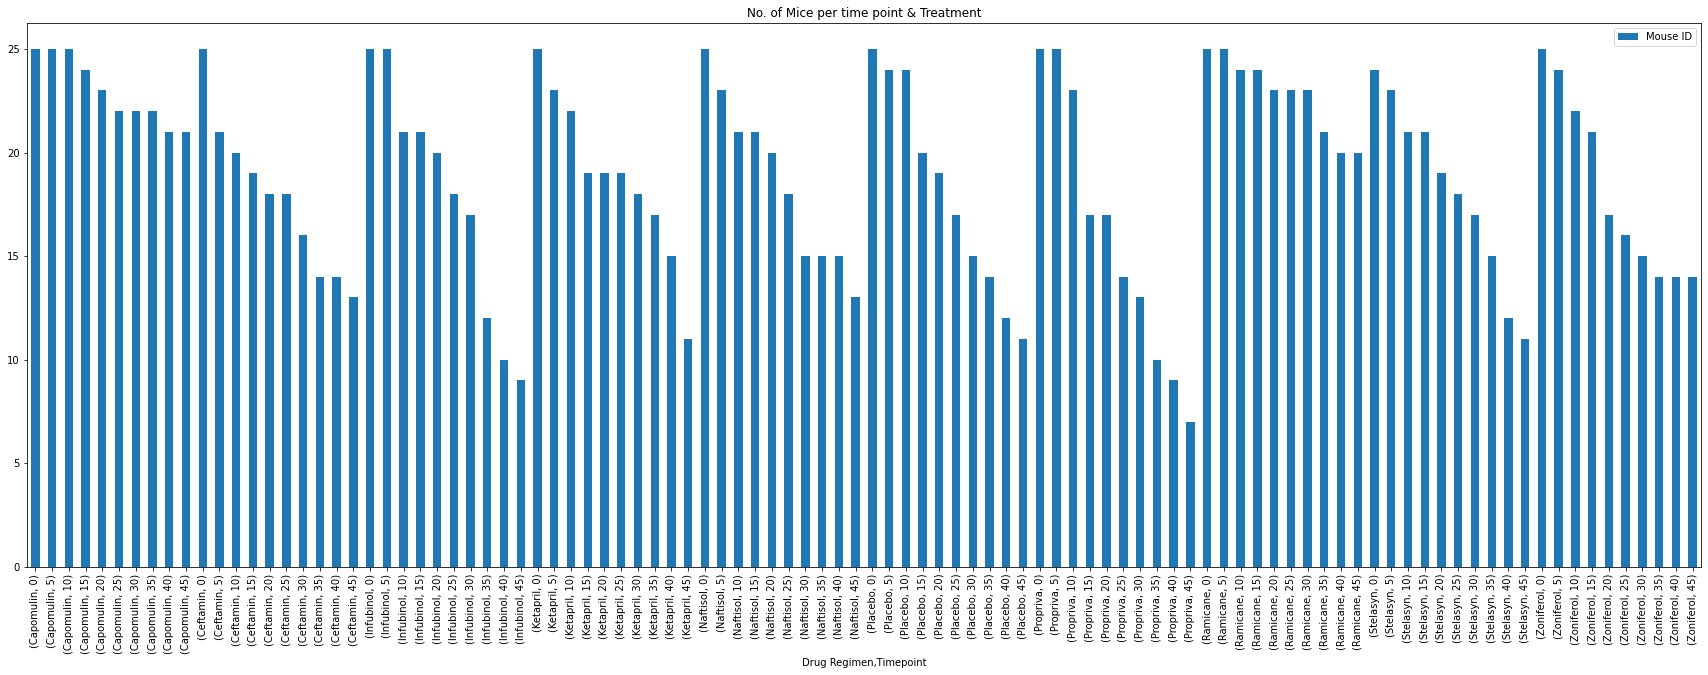

In [72]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# Generate a new data frame with the data
mice_per_timepoint = pd.DataFrame(comb_sm_df.groupby(["Drug Regimen","Timepoint"]).count()['Mouse ID'])
mice_per_timepoint.plot(kind="bar", figsize=(30,10), title="No. of Mice per time point & Treatment")
#mice_per_timepoint.plot(figsize=(30,5));

#mice_per_timepoint



#mice_per_timepoint(kind="bar",autopct="%1.1f%%",title = "Mice Gender Distribution")
# Plot the data






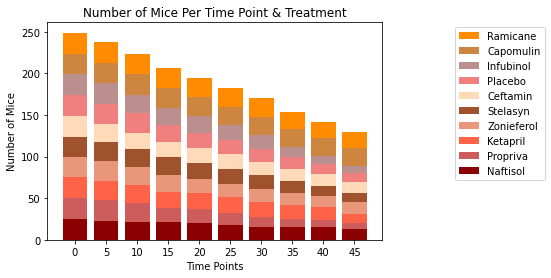

In [73]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#mice_per_timepoint
drugs = comb_sm_df["Drug Regimen"].unique()
time_points = comb_sm_df["Timepoint"].unique()
#print(drugs)
#print(time_points)

#new_df = pd.DataFrame(mice_per_timepoint.groupby(["Drug Regimen"]))
#new_df
#Building a Stack Plot for better presentation
#Building lists for each Drug Regimen
ram_m_count = mice_per_timepoint.loc['Ramicane']
ram_m_count
ram_list = np.array(ram_m_count["Mouse ID"].to_list())
#print(ram_list)

cap_m_count = mice_per_timepoint.loc['Capomulin']
cap_m_count
cap_list = np.array(cap_m_count["Mouse ID"].to_list())
#print(cap_list)

inf_m_count = mice_per_timepoint.loc['Infubinol']
inf_m_count
inf_list = np.array(inf_m_count["Mouse ID"].to_list())
#print(inf_list)

pla_m_count = mice_per_timepoint.loc['Placebo']
pla_m_count
pla_list = np.array(pla_m_count["Mouse ID"].to_list())
#print(pla_list)

cef_m_count = mice_per_timepoint.loc['Ceftamin']
cef_m_count
cef_list = np.array(cef_m_count["Mouse ID"].to_list())
#print(cef_list)

ste_m_count = mice_per_timepoint.loc['Stelasyn']
ste_m_count
ste_list = np.array(ste_m_count["Mouse ID"].to_list())
#print(ste_list)

zon_m_count = mice_per_timepoint.loc['Zoniferol']
zon_m_count
zon_list = np.array(zon_m_count["Mouse ID"].to_list())
#print(zon_list)

ket_m_count = mice_per_timepoint.loc['Ketapril']
ket_m_count
ket_list = np.array(ket_m_count["Mouse ID"].to_list())
#print(ket_list)

pro_m_count = mice_per_timepoint.loc['Propriva']
pro_m_count
pro_list = np.array(pro_m_count["Mouse ID"].to_list())
#print(pro_list)

naf_m_count = mice_per_timepoint.loc['Naftisol']
naf_m_count
naf_list = np.array(naf_m_count["Mouse ID"].to_list())
#print(naf_list)


#bronzes = np.array([38, 17, 26, 19, 15])
#silvers = np.array([37, 23, 18, 18, 10])
#golds = np.array([46, 27, 26, 19, 17])
ind = [x for x, _ in enumerate(time_points)]

plt.bar(ind, ram_list, width=0.8, label='Ramicane', color='darkorange', bottom=cap_list+inf_list+pla_list+cef_list+ste_list+zon_list+ket_list+pro_list+naf_list)
plt.bar(ind, cap_list, width=0.8, label='Capomulin', color='peru', bottom=inf_list+pla_list+cef_list+ste_list+zon_list+ket_list+pro_list+naf_list)
plt.bar(ind, inf_list, width=0.8, label='Infubinol', color='rosybrown', bottom=pla_list+cef_list+ste_list+zon_list+ket_list+pro_list+naf_list)
plt.bar(ind, pla_list, width=0.8, label='Placebo', color='lightcoral', bottom=cef_list+ste_list+zon_list+ket_list+pro_list+naf_list)
plt.bar(ind, cef_list, width=0.8, label='Ceftamin', color='peachpuff',bottom=ste_list+zon_list+ket_list+pro_list+naf_list)
plt.bar(ind, ste_list, width=0.8, label='Stelasyn', color='sienna',bottom=zon_list+ket_list+pro_list+naf_list)
plt.bar(ind, zon_list, width=0.8, label='Zonieferol', color='darksalmon',bottom=ket_list+pro_list+naf_list)
plt.bar(ind, ket_list, width=0.8, label='Ketapril', color='tomato',bottom=pro_list+naf_list)
plt.bar(ind, pro_list, width=0.8, label='Propriva', color='indianred',bottom=naf_list)
plt.bar(ind, naf_list, width=0.8, label='Naftisol', color='darkred')

plt.xticks(ind, time_points)
plt.ylabel("Number of Mice")
plt.xlabel("Time Points")
plt.legend(loc="upper right",bbox_to_anchor=(1.5, 1))
plt.title("Number of Mice Per Time Point & Treatment")

plt.show()


## Pie Plots

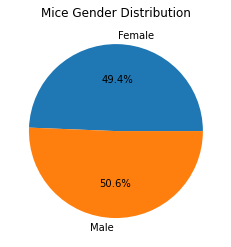

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = (comb_sm_df.groupby("Sex").count()['Mouse ID'])
mice_gender
#sizes = [mice_gender]
#sizes
plt.pie(mice_gender,autopct="%1.1f%%",labels=["Female","Male"])
plt.title("Mice Gender Distribution")
plt.show()

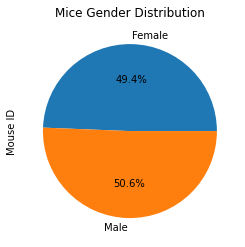

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender.plot(kind="pie",autopct="%1.1f%%",title = "Mice Gender Distribution")

## Quartiles, Outliers and Boxplots

In [76]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen = comb_sm_df.groupby("Mouse ID").last()["Drug Regimen"]
tum_vol = comb_sm_df.groupby("Mouse ID").last()["Tumor Volume (mm3)"]
time_p = comb_sm_df.groupby("Mouse ID").max()["Timepoint"]
quart_df = pd.DataFrame({"Regimen":regimen, "Tumor volume":tum_vol, "Timepoint":time_p})
quart_df = quart_df.loc[quart_df["Regimen"].isin(drugs)]
quart_df

,Regimen,Tumor volume,Timepoint
Mouse ID,,,
a203,Infubinol,67.973419,45
a251,Infubinol,65.525743,45
a275,Ceftamin,62.999356,45
a411,Ramicane,38.407618,45
a444,Ramicane,43.047543,45
...,...,...,...
y769,Ceftamin,68.594745,45
y793,Capomulin,31.896238,45
y865,Ceftamin,64.729837,45


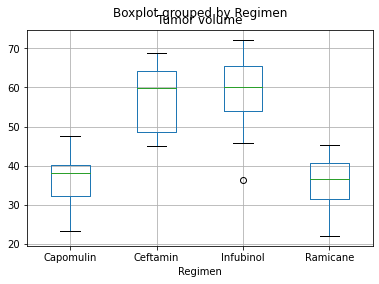

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
quart_df.boxplot(by="Regimen",column="Tumor volume")




## Line and Scatter Plots

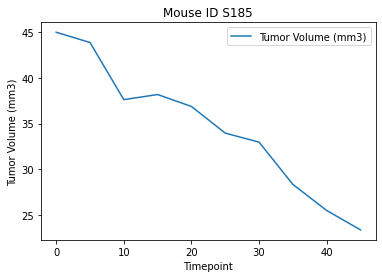

In [77]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_group = comb_sm_df.query("`Drug Regimen`=='Capomulin'")
cap_s185 = cap_group.query("`Mouse ID`=='s185'")
cap_s185 = cap_s185[["Timepoint", "Tumor Volume (mm3)"]]

cap_s185 = cap_s185.set_index("Timepoint")
cap_s185.plot()
plt.ylabel("Tumor Volume (mm3)")
plt.title('Mouse ID S185')
plt.show()


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# See below

## Correlation and Regression

In [78]:
comb_sm_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [79]:
# Calculate the correlation coefficient and linear regression model 
correl_df = comb_sm_df.loc[comb_sm_df["Drug Regimen"] == "Capomulin"]
correl_df
m_weight_cap = correl_df.groupby("Mouse ID").mean()["Weight (g)"]
t_vol_cap = correl_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

cor_df_sum = pd.DataFrame({"Average Weight":m_weight_cap,"Tumor Volume":t_vol_cap})
cor_df_sum

# for mouse weight and average tumor volume for the Capomulin regimen


,Average Weight,Tumor Volume
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


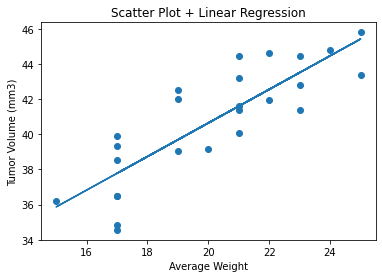

y=0.95x+21.55


In [80]:
correlation = st.pearsonr(cor_df_sum["Average Weight"],cor_df_sum["Tumor Volume"])
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(cor_df_sum["Average Weight"],cor_df_sum["Tumor Volume"])
regress_values = cor_df_sum["Average Weight"]*slope+intercept
line_equation = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(cor_df_sum["Average Weight"],regress_values)
plt.scatter(cor_df_sum["Average Weight"],cor_df_sum["Tumor Volume"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Average Weight")
plt.title('Scatter Plot + Linear Regression')
plt.show()
print(line_equation)